# 人口 分布

In [1]:
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

figsize = (10, 5)

In [2]:
filepath = '../../../data/processed/df_filtered.xlsx'
df = pd.read_excel(filepath)

In [3]:
pop = df['population']
log_pop = df['log_pop']
pop_star = df['pop_star']
log_pop_star = df['log_pop_star']

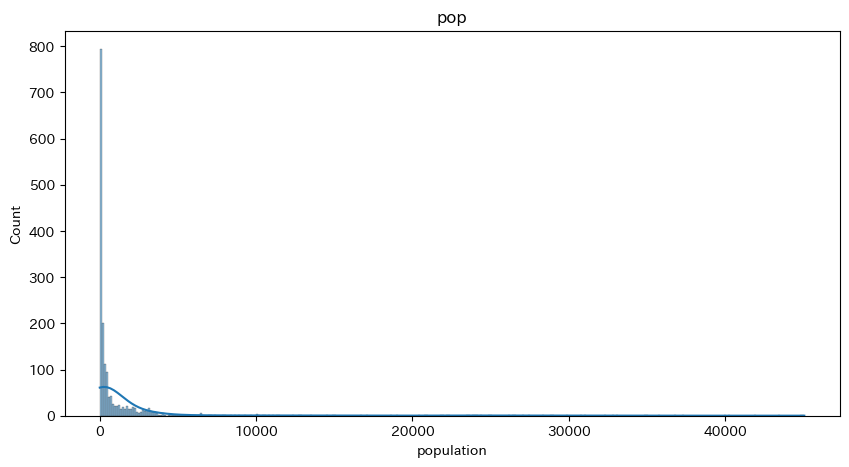

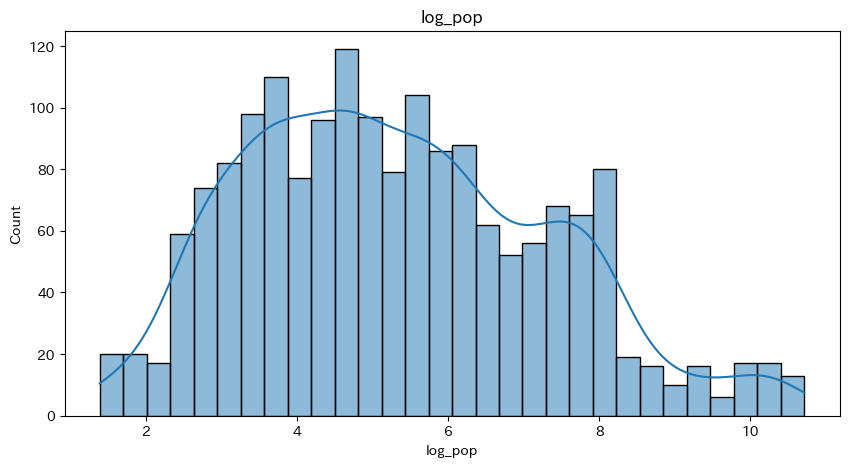

In [10]:
plt.figure(figsize=(10, 5))

sns.histplot(pop, kde=True)
plt.title('pop')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(log_pop, kde=True, bins=30)
plt.title('log_pop')
plt.show()

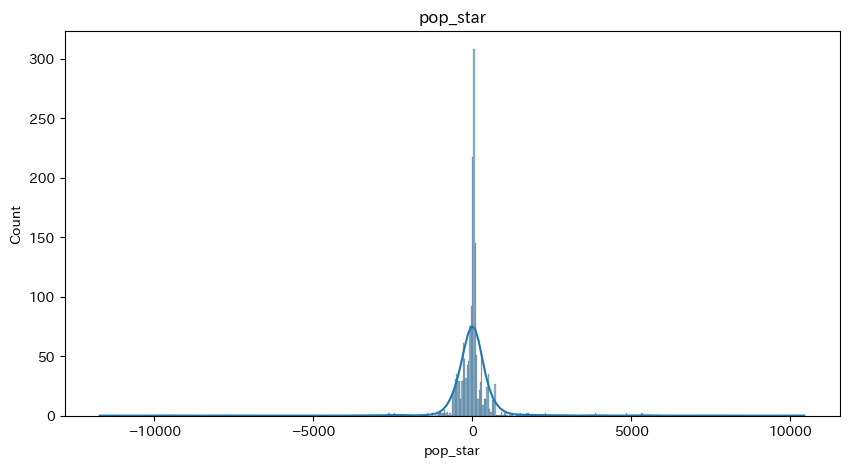

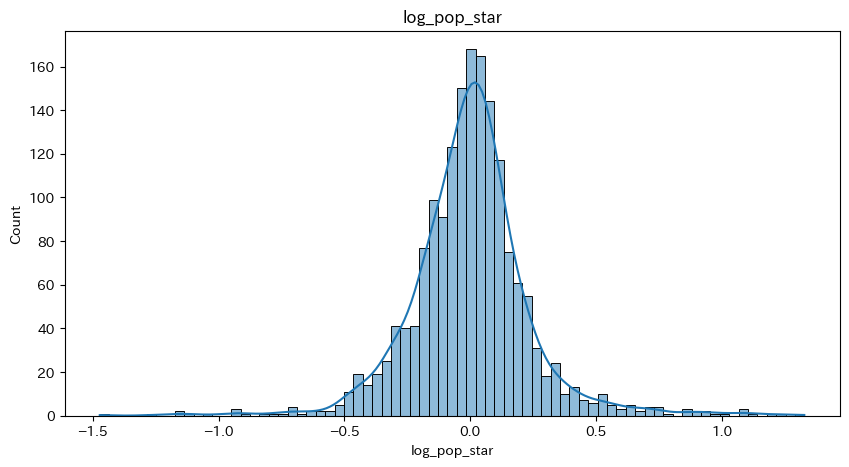

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(pop_star, kde=True)
plt.title('pop_star')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(log_pop_star, kde=True)
plt.title('log_pop_star')
plt.show()

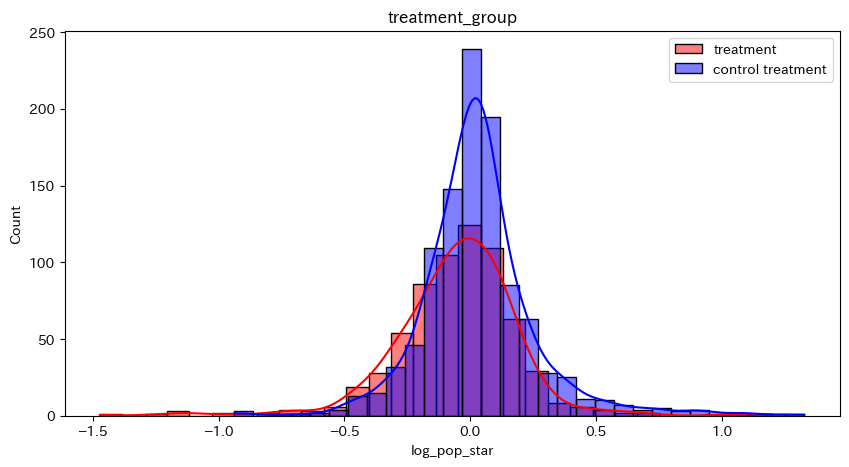

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(df['log_pop_star'][df['treatment_group'] == 1], bins=30, kde=True, color='red', label='treatment')
sns.histplot(df['log_pop_star'][df['treatment_group'] == 0], bins=30, kde=True, color='blue', label='control treatment')
plt.title('treatment_group')
plt.legend()
plt.show()

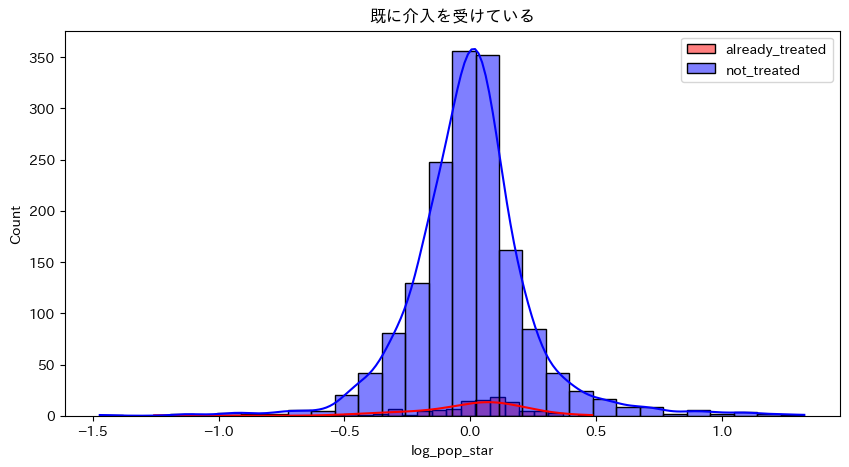

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['log_pop_star'][df['is_already_treated'] == 1], bins=30, kde=True, color='red', label='already_treated')
sns.histplot(df['log_pop_star'][df['is_already_treated'] == 0], bins=30, kde=True, color='blue', label='not_treated')
plt.title('既に介入を受けている')
plt.legend()
plt.show()

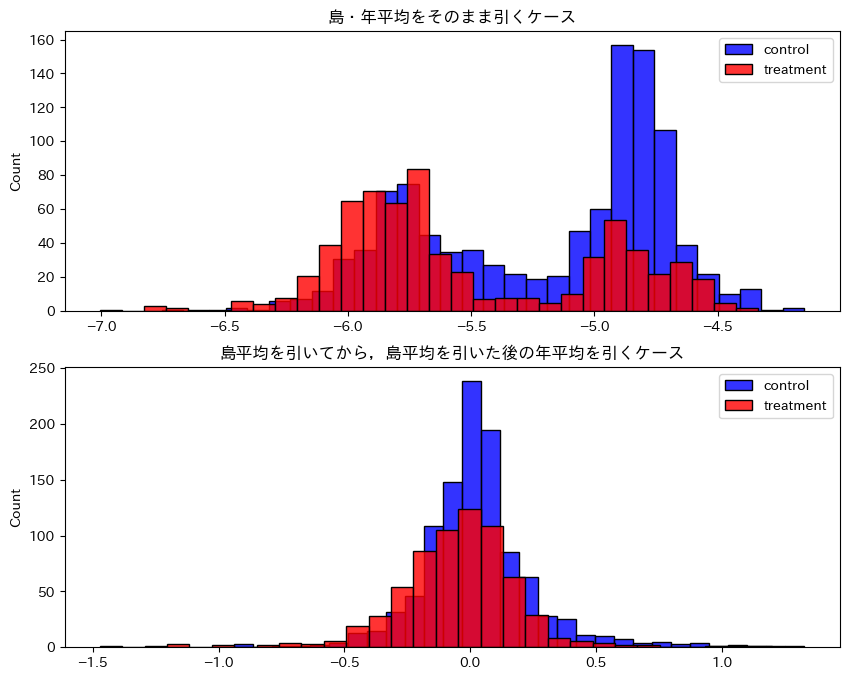

In [20]:
log_pop_i = df.groupby('island_ids')['log_pop'].transform('mean')
log_pop_t = df.groupby('year')['log_pop'].transform('mean')
df['log_pop_2mount'] = df['log_pop'] - log_pop_i - log_pop_t

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
sns.histplot(data=df.query('treatment_group == 0')['log_pop_2mount'], bins=30, color='blue', label='control', ax=ax[0], alpha=0.8)
sns.histplot(data=df.query('treatment_group == 1')['log_pop_2mount'], bins=30, color='red', label='treatment', ax=ax[0], alpha=0.8)
ax[0].set_title('島・年平均をそのまま引くケース')
ax[0].set_xlabel('')
ax[0].legend()

sns.histplot(df['log_pop_star'][df['treatment_group'] == 0], bins=30, color='blue', label='control', ax=ax[1], alpha=0.8)
sns.histplot(df['log_pop_star'][df['treatment_group'] == 1], bins=30, color='red', label='treatment', ax=ax[1], alpha=0.8)
ax[1].set_title('島平均を引いてから，島平均を引いた後の年平均を引くケース')
ax[1].set_xlabel('')
ax[1].legend()

## 推移

## 島別の分散

In [21]:
sigma_i = df.groupby('island_ids')['log_pop_star'].std()
sigma_i.describe()

count    94.000000
mean      0.191469
std       0.146893
min       0.020647
25%       0.090140
50%       0.151969
75%       0.235365
max       0.792815
Name: log_pop_star, dtype: float64

# 島ごとの人口推移

/tmp/ipykernel_7700/717855554.py:4: UserWarning: 
The palette list has fewer values (1) than needed (94) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df, palette=['black'], ax=ax)


Text(0.5, 1.0, '島別の人口増加率')

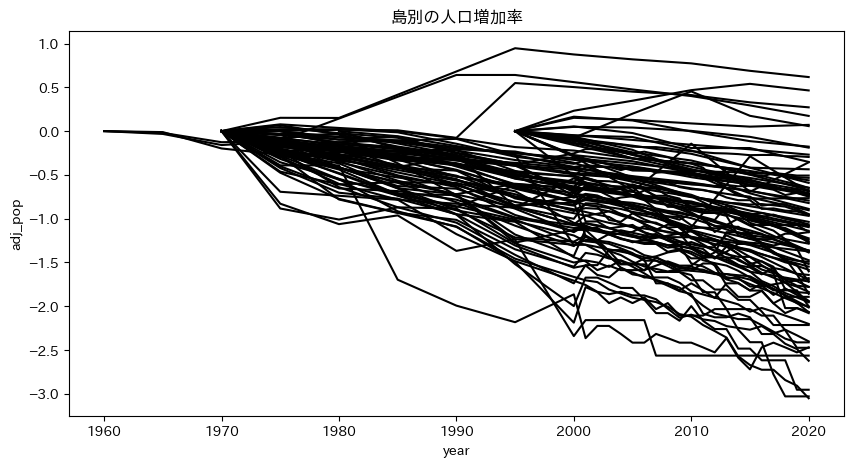

In [19]:
df['adj_pop'] = df['log_pop'] - df.groupby('island_ids')['log_pop'].transform('first')

fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df, palette=['black'], ax=ax)
ax.legend().remove()
plt.title('島別の人口増加率')

/tmp/ipykernel_7700/4054826078.py:4: UserWarning: 
The palette list has fewer values (1) than needed (45) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df[df['treatment_group'] == 0], palette=['black'], ax=ax)


Text(0.5, 1.0, '島別の人口増加率')

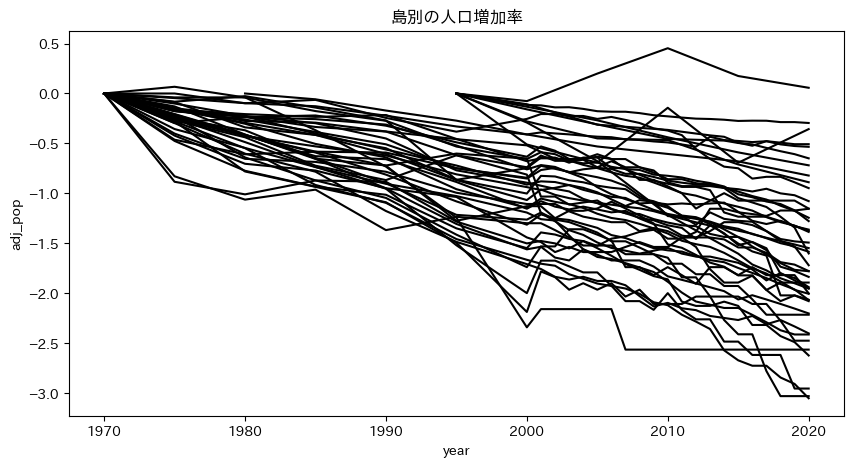

In [20]:
df['adj_pop'] = df['log_pop'] - df.groupby('island_ids')['log_pop'].transform('first')

fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df[df['treatment_group'] == 0], palette=['black'], ax=ax)
ax.legend().remove()
plt.title('島別の人口増加率')

/tmp/ipykernel_7700/2161601625.py:4: UserWarning: 
The palette list has fewer values (1) than needed (49) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df[df['treatment_group'] == 1], palette=['black'], ax=ax)


Text(0.5, 1.0, '島別の対数人口')

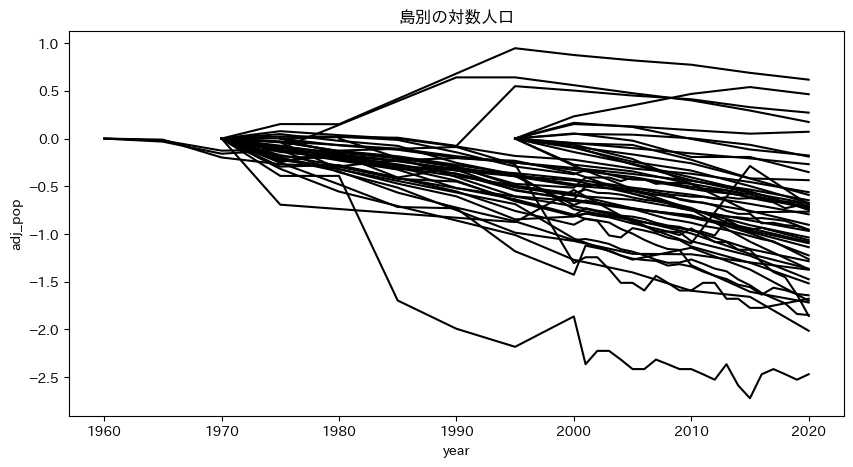

In [23]:
df['adj_pop'] = df['log_pop'] - df.groupby('island_ids')['log_pop'].transform('first')

fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df[df['treatment_group'] == 1], palette=['black'], ax=ax)
ax.legend().remove()
plt.title('島別の対数人口')

/tmp/ipykernel_21454/2383172923.py:2: UserWarning: 
The palette list has fewer values (1) than needed (94) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='population', hue='island_ids', data=df, palette=['black'])


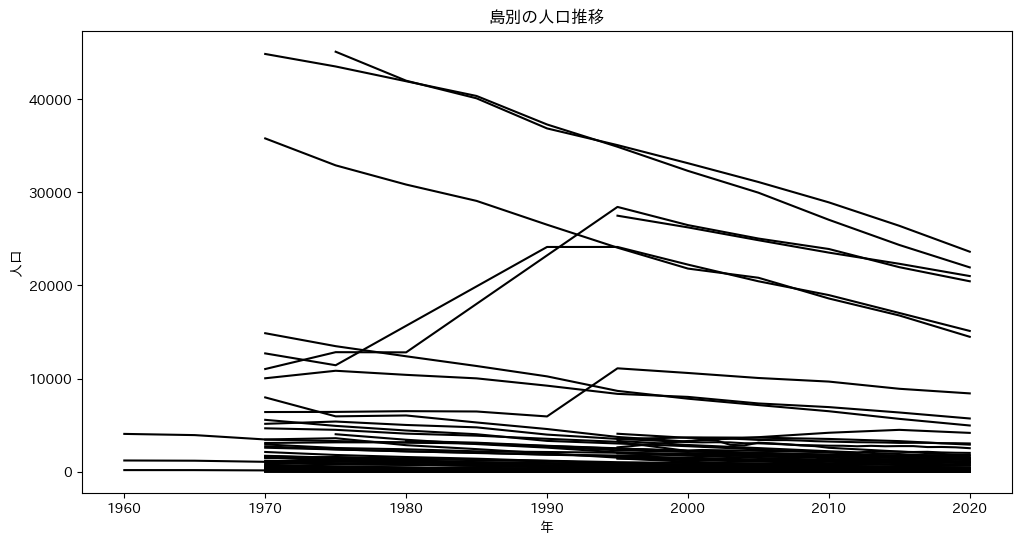

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='population', hue='island_ids', data=df, palette=['black'])
plt.title('島別の人口推移')
plt.ylabel('人口')
plt.xlabel('年')
plt.legend().remove()
plt.show()

/tmp/ipykernel_7700/1919287779.py:11: UserWarning: 
The palette list has fewer values (1) than needed (68) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970, palette=['black'], ax=ax)


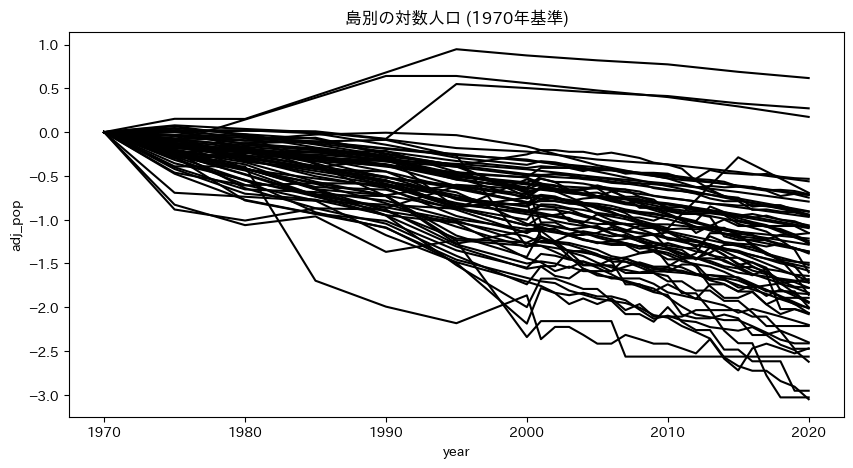

In [72]:
island_list_1970 = df[df['year'] == 1970].dropna(subset=['log_pop'])['island_ids'].unique()

df_1970 = df[df['island_ids'].isin(island_list_1970)]
df_1970 = df_1970[~df_1970['year'].isin([1960, 1965])]

df_1970['adj_pop'] = df_1970['log_pop'] - df_1970.groupby('island_ids')['log_pop'].transform('first')

nunique = df_1970['island_ids'].nunique()

fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970, palette=['black'], ax=ax)
ax.legend().remove()
ax.set_title(f'島別の対数人口 (1970年基準)')
plt.show()

/tmp/ipykernel_7700/4249617311.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970[df['treatment_group'] == 1], palette=['black'], ax=ax)
/tmp/ipykernel_7700/4249617311.py:2: UserWarning: 
The palette list has fewer values (1) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970[df['treatment_group'] == 1], palette=['black'], ax=ax)


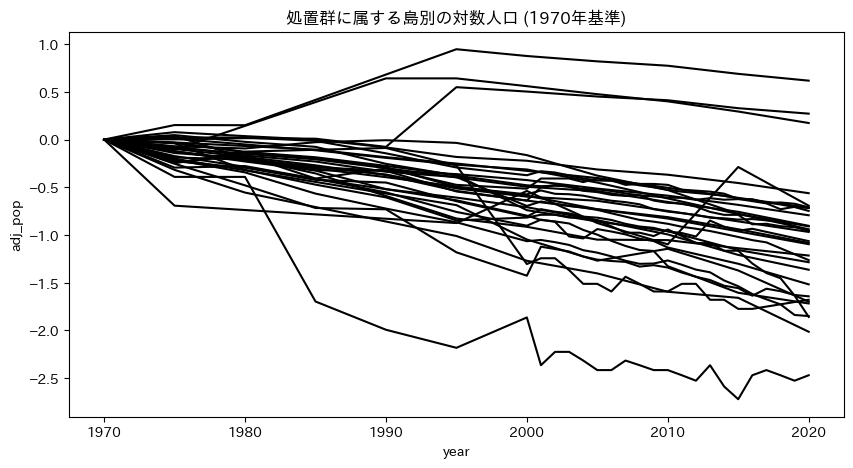

In [77]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970[df['treatment_group'] == 1], palette=['black'], ax=ax)
ax.legend().remove()
ax.set_title(f'処置群に属する島別の対数人口 (1970年基準)')
plt.show()

/tmp/ipykernel_7700/2809766494.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970[df['treatment_group'] == 0], palette=['black'], ax=ax)
/tmp/ipykernel_7700/2809766494.py:2: UserWarning: 
The palette list has fewer values (1) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970[df['treatment_group'] == 0], palette=['black'], ax=ax)


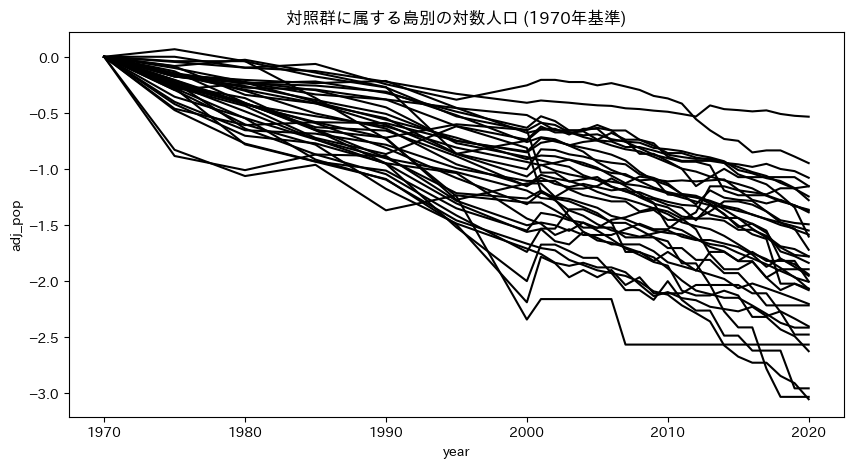

In [76]:
fig, ax = plt.subplots(figsize=figsize)
sns.lineplot(x='year', y='adj_pop', hue='island_ids', data=df_1970[df['treatment_group'] == 0], palette=['black'], ax=ax)
ax.legend().remove()
ax.set_title(f'対照群に属する島別の対数人口 (1970年基準)')
plt.show()